> ## **Introdução ao Processamento Digital de Imagens - Trabalho Prático**

> #### **Grupo**: Ewerton Cavalcanti (20160142334), Franklin Anthony (20180160017), José Victor Gorgonho (20180091475), Luiz Henrique (2016014682) e Michel Lavezzo (20180164197)

> ## **Introdução**

A atividade prática consiste no desenvolvimento de um sistema capaz de abrir, exibir, manipular e salvar imagens, utilizando-as como entrada para métodos que realizarão processamento digital das mesmas, resultando nos seguintes pontos: conversão da imagem no formato RGB para YIQ e para RGB novamente; aplicação de negativo em RGB (uma banda por vez) e no "Y" da representação em YIQ, seguida de conversão para RGB; aplicação da correlação m x n sobre RGB, com _offset_, pivô e filtro definidos em um arquivo no formato ```.txt```, testando com filtros da média, Sobel horizontal e vertica; implementação do filtro mediana m x n; e, por fim, o controle de saturação no formato HSB, seguido de conversão para RGB. 

Como objetivos gerais deste trabalho, temos os seguintes: 

*   Realizar a correta abertura, exibição, manipulação e salvamento de todas as imagens que forem utilizadas no processo de desenvolvimento deste trabalho;
*   Pesquisar e implementar algoritmos que executem corretamente os itens propostos; 
*   Obter os resultados almejados, descritos nas especificações.



> ## **Materiais e métodos**

Em um primeiro momento, implementamos os seguintes pontos: abertura, exibição e manipulação de imagens. Vale salientar, quanto ao salvamento, que apenas as imagens pós-processadas foram salvas, como expostas nos resultados a seguir. Para acesso ao Drive, montamos o mesmo através do método ```drive.mount("Mount")```. Para manipularmos as imagens, utilizamos as blbliotecas ```PIL```, para criação da imagem, ```numpy```, para manipulação das imagens no formato ```np.array()```, ```matplotlib.pyplot```, para auxiliar na visualização e ```os```, para acesso aos diretórios do Drive montado anteriormente.

<Primeiro item>

No que se refere ao processo de conversão RGB-YIQ-RGB, foram utilizadas as seguintes equações: 

*   Para a conversão RGB-YIQ:
    *  Y = 0.299 R + 0.587 G + 0.114 B
    *  I = 0.596 R - 0.274 G - 0.322 B
    *  Q = 0.211 R - 0.523 G + 0.312 B

*   Para a conversão YIQ-RGB:
    *  R = 1.000 Y + 0.956 I + 0.621 Q
    *  G = 1.000 Y - 0.272 I - 0.647 Q
    *  B = 1.000 Y - 1.106 I + 1.703 Q

Para garantir a correta conversão para RGB, ajustamos os limites inferior e superior dos valores de cada pixel entre 0 e 255, além de tornar o valor um número inteiro, já que no formato YIQ, os pixels podem ter valores negativos, maiores que 255 e decimais. Por fim, a imagem resultante foi gerada.

\\

<Segundo item>

Em seguida, aplicamos o _negativo_ em RGB, uma banda por vez, e em Y, seguido de conversão para RGB. Para isso, aplicamos o complemento nas componentes em questão:

*   Para negativo em RGB e Y (seguido de conversão para RGB):
    *  BANDA = 255 - BANDA

\\

<Terceiro item>

No contexto da correlação, foram utilizados pivô, _offset_ e filtro descriminados em arquivos ```.txt```. Para validar o correto processamento da implementação da correlação, utilizamos os seguintes filtros:

*  Média, com dimensões quadradas
    *  3x3, por exemplo

      \begin{bmatrix}
        1/9 & 1/9 & 1/9\\
        1/9 & 1/9 & 1/9\\
        1/9 & 1/9 & 1/9
      \end{bmatrix}

\\

*  Sobel horizontal

      \begin{bmatrix}
        1 & 2 & 1\\
        0 & 0 & 0\\
        -1 & -2 & -1
      \end{bmatrix}

\\

*  Sobel vertical

      \begin{bmatrix}
        -1 & 0 & 1\\
        -2 & 0 & 2\\
        -1 & 0 & 1
      \end{bmatrix}

\\

* Filtros genéricos
    * 3x5, por exemplo
        
        \begin{bmatrix}
        3 & 2 & 1 & 0 & 0\\
        0 & 0 & 1 & 2 & 3\\
        3 & 2 & 1 & 0 & 0\\
      \end{bmatrix}

\\

No caso da implementação dos filtros Sobel horizontal e vertical, ainda, foram considerados valores absolutos e a expansão de histograma, para a visualização da imagem em tons de cinza.

No que se refere à estrutura dos arquivos ```.txt```, seguimos o seguinte template:

* Como exemplo, temos um filtro genérico 2x3

$$3 \ 2 \ \rightarrow \textsf{Tamanho da máscara}\\ 
0.5 \ 0.4 \ 0.3 \ \rightarrow \textsf{Máscara} \\ 
0.2 \ 0.1 \ 0.15 \ \rightarrow \textsf{Fim da máscara} \\
1 \ 1 \ \rightarrow \textsf{Posição do pivô}\\
50 \ \rightarrow \textsf{Offset}\\
0 \ \rightarrow \textsf{ID}$$

Em relação ao ID, que serviu para o redirecionamento do fluxo de execução do algoritmo, assumimos o seguinte padrão:

* ID = 0 
  * Filtros da média e genérico
* ID = 1
  * Filtro Sobel vertical
* ID = 2
  * Filtro Sobel horizontal

\\

<Quarto item>

Em relação à implementação do filtro da mediana nas componentes R, G e B (uma por vez), foi escolhida a dimensão do mesmo através de valores passados pelo usuário. Assim, o filtro aplicado, a cada iteração, ordenou os pixels em ordem crescente, e, por fim, retornou o elemento central. Os resultados demonstraram um processo de suavização, como esperado. A suavização, por sua vez, se tornou mais branda ou mais perceptível, de acordo com a dimensão escolhida. Quanto maior a dimensão do filtro, maior a suavização, e vice-versa.

\\

<Quinto item>

Por fim, convertemos a imagem RGB para HSV (Matiz, Saturação e Valor), ajustamos a saturação conforme a entrada do usuário e convertemos novamente para RGB, para a correta visualização do aumento ou diminuição na intensidade das cores na imagem original.

> ## **Resultados**

Acessando o Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/Mount/')

Mounted at /content/Mount/


Importando as bibliotecas ```PIL```, ```numpy```, ```matplotlib.pyplot```, ```os``` e ```math``` para o acesso e a manipulação das imagens que serão utlizadas em todo o processo de desenvolvimento.

In [ ]:
from PIL import Image 
from PIL import ImageFilter
from PIL import ImageEnhance
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os
import math

Listando todas as imagens localizadas no diretório em questão.

In [ ]:
os.chdir('/content/Mount/My Drive/Colab Notebooks/images-dip')
os.getcwd()
os.listdir()

['DancingInWater.jpg',
 'testpat.1k.color.tif',
 'Shapes.png',
 'img_rgb_hsv.jpg',
 'img_hsv_rgb.jpg',
 'img_hsv_mediana_1_1.jpg',
 'media_3x3_pivo_0x2_offset_25.txt',
 'media_7x7_pivo_2x2_offset_10.txt',
 'sobel_v_3x3_pivo_1x1_offset_50.txt',
 'sobel_h_3x3_pivo_0x0_offset_50.txt',
 'img_correlecao_genérica_1_1.jpg',
 'generico_1x1_pivo_0x0_offset_10.txt',
 'generico_3x5_pivo_1x2_offset_10.txt',
 'generico_3x2_pivo_0x2_offset_10.txt',
 'colorsResize.jpg',
 'colors_channels.jpg',
 'img_yiq_rgb.jpg',
 'img_negative_R.jpg',
 'img_negative_B.jpg',
 'img_negative_G.jpg',
 'img_negative_RGB.jpg',
 'img_negative_Y.jpg',
 'img_correlecao_media_3_3.jpg',
 'img_correlecao_media_7_7.jpg',
 'img_correlecao_generica_1_1.jpg',
 'img_correlecao_generica_3_2.jpg',
 'img_correlecao_generica_3_5.jpg',
 'img_correlecao_sobel_h_3_3.jpg',
 'img_correlecao_sobel_v_3_3.jpg',
 'img_hsv_mediana_7_9.jpg',
 'img_hsv_mediana_5_5.jpg',
 'DancingResize.jpg',
 'img_rgb_hsv_s-.jpg',
 'img_hsv_rgb_s-.jpg',
 'img_rgb_

Abrindo a imagem com o auxílio da biblioteca ```PIL```.

In [ ]:
colors = Image.open('testpat.1k.color.tif')
print('Mode:',colors.mode)
print('Size:',colors.size)
print('Type:',type(colors))

Mode: RGB
Size: (1024, 1024)
Type: <class 'PIL.TiffImagePlugin.TiffImageFile'>


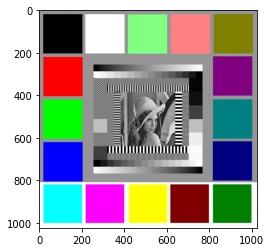

In [ ]:
plt.imshow(colors)

Realizando a diminuição na quantidade de pixels da imagem, para ganho de tempo de processamento.

Mode: RGB
Size: (800, 800)


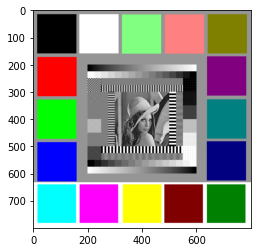

In [ ]:
colorsResize = colors.resize((800, 800))
print('Mode:',colorsResize.mode)
print('Size:',colorsResize.size)
colorsResize.save("colorsResize.jpg")
plt.imshow(colorsResize)

Separando a imagem entre as três componentes, em tons de cinza: R, G e B.

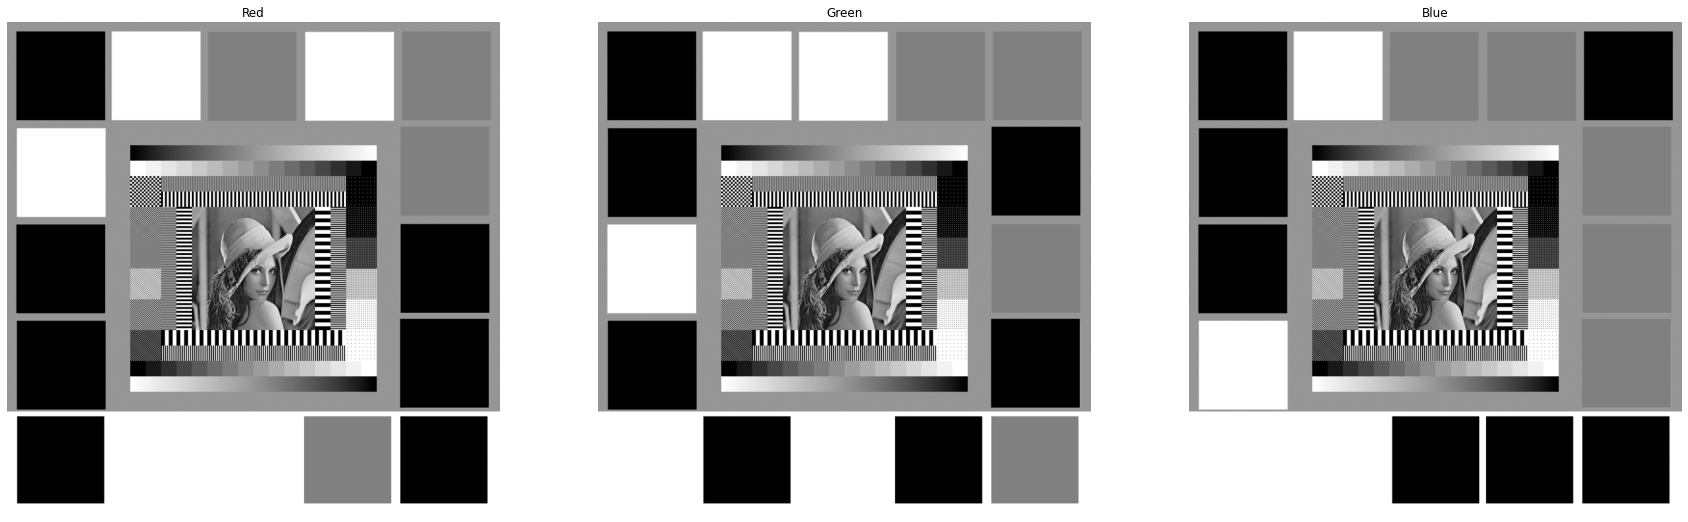

In [ ]:
Channels = colorsResize.split()

fig = plt.figure(figsize=(30, 10))

fig.add_subplot(1, 3, 1)
plt.imshow(Channels[0], cmap='gray')
plt.axis('off')
plt.title("Red")

fig.add_subplot(1, 3, 2)
plt.imshow(Channels[1], cmap='gray')
plt.axis('off')
plt.title("Green")

fig.add_subplot(1, 3, 3)
plt.imshow(Channels[2], cmap='gray')
plt.axis('off')
plt.title("Blue")

plt.savefig("colors_channels.jpg")

Pode-se notar que as partes mais escuras dizem respeito à ausência ou presença fraca de cada componente em questão na imagem original; as partes mais claras, por sua vez, denotam à presença da componente em comparação à imagem original.

> ### **Primeira item**: Conversão RGB-YIQ-RGB

Visualização da imagem original.

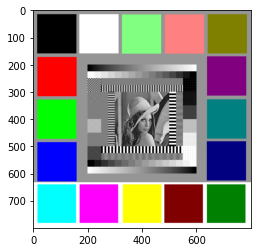

In [ ]:
plt.imshow(colorsResize)

Desenvolvimento da função que realiza a conversão RGB-YIQ-RGB.

In [ ]:
def rgb_yiq_rgb(width, height, matrix_pixels):
  # Varrendo todas as colunas e linhas
  for i in range(width):
      for j in range(height):
          # Dado o pixel na posição [i,j]
          pixel = matrix_pixels[i,j]
        
          # Pixel separado nas 3 componentes
          R = pixel[0]
          G = pixel[1]
          B = pixel[2]
          
          # Conversão para YIQ, através das fórmulas
          Y = 0.299*R + 0.587*G + 0.114*B
          I = 0.596*R - 0.274*G - 0.322*B
          Q = 0.211*R - 0.523*G + 0.312*B

          # Conversão de volta para RGB, tornando o resultado um valor inteiro
          R = round(1.000*Y + 0.956*I + 0.621*Q)
          G = round(1.000*Y - 0.272*I - 0.647*Q)
          B = round(1.000*Y - 1.106*I + 1.703*Q)

          # Ajustando os limites para 0 e 255, a partir dos ternários
          R = 0 if R < 0 else R
          R = 255 if R > 255 else R
          G = 0 if G < 0 else G
          G = 255 if G > 255 else G
          B = 0 if B < 0 else B
          B = 255 if B > 255 else B

          # Pixel resultante
          new_pixel = (R, G, B)

          # Inserção do novo pixel na matriz
          matrix_pixels[i,j] = new_pixel

Executando o método de conversão RGB-YIQ-RGB.

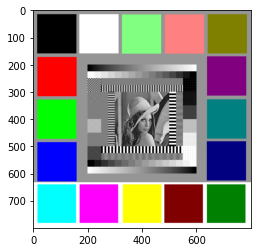

In [ ]:
# Imagem a ser processada
img_yiq_rgb = colorsResize

# Altura e largura da imagem
width = img_yiq_rgb.size[0]
height = img_yiq_rgb.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_yiq_rgb.load()

# Passando os atributos para o método
rgb_yiq_rgb(width, height, matrix_pixels)
# Salvando a imagem resultante
img_yiq_rgb.save("img_yiq_rgb.jpg")
plt.imshow(img_yiq_rgb)

Um ponto importante aqui está no fato de que não houve alteração quanto às fórmulas. Portanto, a imagem resultante deve ser equivalente à de entrada, o que demonstra o correto desenvolvimento do algoritmo.

> ### **Segundo item**: Aplicando negativo

Desenvolvimento da função que aplica o negativo em RGB (banda a banda) e em Y seguido de conversão para RGB, de acordo com o parâmetro escolhido pelo usuário.

In [ ]:
def negative(width, height, matrix_pixels, opcao):
  # Varrendo todos as colunas e linhas
  for i in range(width):
      for j in range(height):
          # Dado o pixel na posição [i,j]
          pixel = matrix_pixels[i,j]
          
          # Pixel separado nas 3 componentes
          R = pixel[0]
          G = pixel[1]
          B = pixel[2]

          # Se a opção de negativo for em R
          if opcao == 'R':
              R = 255 - R 
          
          # Se a opção de negativo for em G
          elif opcao == 'G':
              G = 255 - G

          # Se a opção de negativo for em B
          elif opcao == 'B':
              B = 255 - B

          # Se a opção de negativo for em RGB
          elif opcao == 'RGB':
              R = 255 - R
              G = 255 - G
              B = 255 - B

          # Se a opção de negativo for em Y
          elif opcao == 'Y':
              # Converte para YIQ
              Y = 0.299*R + 0.587*G + 0.114*B
              I = 0.596*R - 0.274*G - 0.322*B
              Q = 0.211*R - 0.523*G + 0.312*B
              
              # Aplica negativo apenas em Y
              Y = 255 - Y

              # Conversão de volta para RGB, tornando o resultado um valor inteiro
              R = round(1.000*Y + 0.956*I + 0.621*Q)
              G = round(1.000*Y - 0.272*I - 0.647*Q)
              B = round(1.000*Y - 1.106*I + 1.703*Q)

              # Ajustando os limites para 0 e 255, a partir dos ternários
              R = 0 if R < 0 else R
              R = 255 if R > 255 else R
              G = 0 if G < 0 else G
              G = 255 if G > 255 else G
              B = 0 if B < 0 else B
              B = 255 if B > 255 else B

          # Pixel resultante
          new_pixel = (R, G, B)

          # Inserção do novo pixel na matriz
          matrix_pixels[i,j] = new_pixel

Visualização da imagem original.

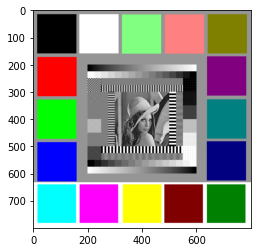

In [ ]:
colors = Image.open("testpat.1k.color.tif")
img_negative = colors.resize((800, 800))
plt.imshow(img_negative)

Executando método que aplica negativo em R.

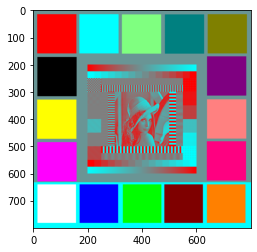

In [ ]:
# Altura e largura da imagem
width = img_negative.size[0]
height = img_negative.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_negative.load()

# Opção para aplicação do negativo
opcao = 'R'

# Passando os atributos para o método
negative(width, height, matrix_pixels, opcao)
# Salvando a imagem negativa em R
img_negative.save("img_negative_" + opcao + ".jpg")
plt.imshow(img_negative)

Pode-se notar, no caso de negativo aplicado à banda R, que a imagem resultante condiz com o esperado. Podemos citar, dentre outros pontos, as seguintes alterações:

*   Cor vermelha $\rightarrow$ Cor preta
*   Cor preta $\rightarrow$ Cor vermelha
*   Cor branca $\rightarrow$ Cor ciano
*   Cor amarela $\rightarrow$ Cor verde
*   Cor azul $\rightarrow$ Cor majenta

Visualização da imagem original.

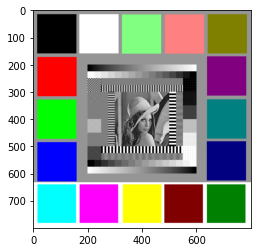

In [ ]:
colors = Image.open("testpat.1k.color.tif")
img_negative = colors.resize((800, 800))
plt.imshow(img_negative)

Executando método que aplica negativo em G.

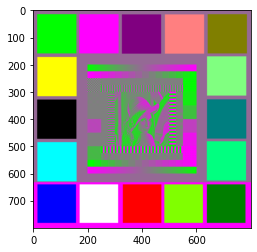

In [ ]:
# Altura e largura da imagem
width = img_negative.size[0]
height = img_negative.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_negative.load()

# Opcao para aplicação do negativo
opcao = 'G'

# Passando os atributos para o método
negative(width, height, matrix_pixels, opcao)
# Salvando a imagem negativa em G
img_negative.save("img_negative_" + opcao + ".jpg")
plt.imshow(img_negative)

Pode-se notar, no caso de negativo aplicado à banda G, que a imagem resultante condiz com o esperado. Podemos citar, dentre outros pontos, as seguintes alterações:

*   Cor verde $\rightarrow$ Cor preta
*   Cor preta $\rightarrow$ Cor verde
*   Cor branca $\rightarrow$ Cor majenta
*   Cor amarela $\rightarrow$ Cor vermelha
*   Cor azul $\rightarrow$ Cor ciano


Visualização da imagem original.

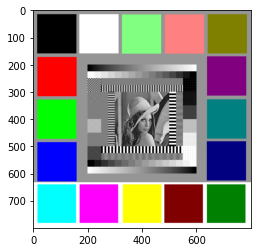

In [ ]:
colors = Image.open("testpat.1k.color.tif")
img_negative = colors.resize((800, 800))
plt.imshow(img_negative)

Executando método que aplica negativo em B.

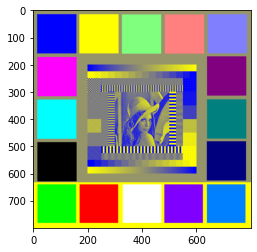

In [ ]:
# Altura e largura da imagem
width = img_negative.size[0]
height = img_negative.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_negative.load()

# Opção para aplicação do negativo
opcao = 'B'

# Passando os atributos para o método
negative(width, height, matrix_pixels, opcao)
# Salvando a imagem negativa em B
img_negative.save("img_negative_" + opcao + ".jpg")
plt.imshow(img_negative)

Pode-se notar, no caso de negativo aplicado à banda B, que a imagem resultante condiz com o esperado. Podemos citar, dentre outros pontos, as seguintes alterações:

*   Cor azul $\rightarrow$ Cor preta
*   Cor preta $\rightarrow$ Cor azul
*   Cor branca $\rightarrow$ Cor amarela
*   Cor amarela $\rightarrow$ Cor branco
*   Cor vermelha $\rightarrow$ Cor majenta


Visualização da imagem original.

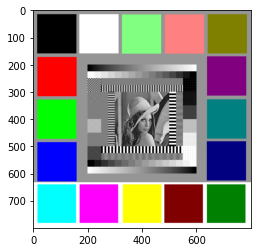

In [ ]:
colors = Image.open("testpat.1k.color.tif")
img_negative = colors.resize((800, 800))
plt.imshow(img_negative)

Executando método que aplica negativo em RGB.

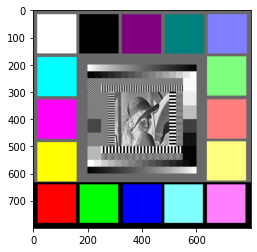

In [ ]:
# Altura e largura da imagem
width = img_negative.size[0]
height = img_negative.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_negative.load()

# Opcao para aplicação do negativo
opcao = 'RGB'

# Passando os atributos para o método
negative(width, height, matrix_pixels, opcao)
# Salvando a imagem negativa em B
img_negative.save("img_negative_" + opcao + ".jpg")
plt.imshow(img_negative)

Pode-se notar, no caso de negativo aplicado à RGB, que a imagem resultante condiz com o esperado. Podemos citar, dentre outros pontos, as seguintes alterações:

*   Cor branca $\rightarrow$ Cor preta
*   Cor preta $\rightarrow$ Cor branca
*   Cor vermelha $\rightarrow$ Cor ciano
*   Cor amarela $\rightarrow$ Cor azul
*   Cor azul $\rightarrow$ Cor amarela

Visualização da imagem original.

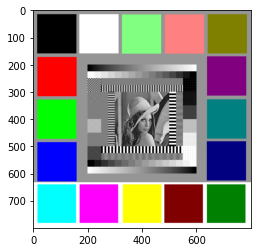

In [ ]:
colors = Image.open("testpat.1k.color.tif")
img_negative = colors.resize((800, 800))
plt.imshow(img_negative)

Executando método que aplica negativo em Y.

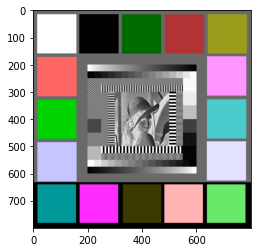

In [ ]:
# Altura e largura da imagem
width = img_negative.size[0]
height = img_negative.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_negative.load()

# Opcao para aplicação do negativo
opcao = 'Y'

# Passando os atributos para o método
negative(width, height, matrix_pixels, opcao)
# Salvando a imagem negativa em Y
img_negative.save("img_negative_" + opcao + ".jpg")
plt.imshow(img_negative)

Pode-se notar, no caso de negativo aplicado à banda Y, que as crominâncias são preservadas, afetando apenas o brilho (cores claras ficam menos claras e cores escuras ficam menos escuras). Podemos citar, dentre outros pontos, as seguintes alterações:

Já ao aplicar o filtro negativo na banda Y(Brilho) do YIQ, nós conseguiremos preservar o perfeitamente as matizes de cores, afetando apenas o brilho da imagem.

*   Cor vermelha $\rightarrow$ Cor opaca
*   Cor preta $\rightarrow$ Cor branca
*   Cor branca $\rightarrow$ Cor preta
*   Cor amarela $\rightarrow$ Cor opaca
*   Cor azul $\rightarrow$ Cor opaca

> ### **Terceiro item**: Correlação m x n sobre R, G e B, com offset, filtro e pivô definidos em um arquivo à parte



Desenvolvimento da função que aplica o filtro de Sobel vertical e horizontal, de acordo com o parâmetro escolhido pelo usuário. Vale salientar que optamos por desenvolver o método de Sobel à parte, para a função conjunta não ficar muito verbosa. Este método está sendo invocado na função de correlação logo em seguida.

In [ ]:
def sobelFilter(matrix_pixels, sobel):
    #definindo a matriz de sobel
    verticalFilter = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
    horizontalFilter = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    #extraindo r g e b da imagem
    r_img, g_img, b_img = matrix_pixels[:, :, 0], matrix_pixels[:, :, 1], matrix_pixels[:, :, 2]

    image = r_img + g_img + b_img
    #plt.imshow(image)(image)
    #image = image/255
    #adicionando as matrizes relacionadas ao filtro de sobel, GX - vertical, gy - horizontal
    Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
    Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

    [linhas, colunas] = np.shape(image)  # capturando a quantidade de linhas e colunas da imagem
    final_image = np.zeros(shape=(linhas, colunas))
    if sobel == "V":
      for i in range(linhas - 2):
        for j in range(colunas - 2):
            gx = np.sum(np.multiply(Gx, image[i:i + 3, j:j + 3]))  # sobel eixo x
            #gy = np.sum(np.multiply(Gy, image[i:i + 3, j:j + 3]))  # sobel eixo y
            final_image[i + 1, j + 1] = np.sqrt(gx ** 2)  # calculando a "hipotenusa"
    elif sobel == "H":
      for i in range(linhas - 2):
        for j in range(colunas - 2):
            #gx = np.sum(np.multiply(Gx, image[i:i + 3, j:j + 3]))  # sobel eixo x
            gy = np.sum(np.multiply(Gy, image[i:i + 3, j:j + 3]))  # sobel eixo y
            final_image[i + 1, j + 1] = np.sqrt(gy ** 2)  # calculando a "hipotenusa"
    else:
      for i in range(linhas - 2):
        for j in range(colunas - 2):
            gx = np.sum(np.multiply(Gx, image[i:i + 3, j:j + 3]))  # sobel eixo x
            gy = np.sum(np.multiply(Gy, image[i:i + 3, j:j + 3]))  # sobel eixo y
            final_image[i + 1, j + 1] = np.sqrt(gy ** 2 + gx ** 2)  # calculando a "hipotenusa"
    
    array_gray = final_image.astype(int) # Convertendo array 'final_image' para inteiro
    histogram_array = np.bincount(array_gray.flatten(), minlength=256) # Calculando recorrência de cada valor com uma quantidade mínima de 256 amostras

    num_pixels = np.sum(histogram_array) # Efetuando somatório do array para descobrir o número de pixels
    histogram_array = histogram_array/num_pixels # Dividindo o array pelo número total de pixels

    chistogram_array = np.cumsum(histogram_array) # Efetua somatório cumulativo de somatório para gerar

    transform_map = np.floor(255 * chistogram_array)
    img_list = list(array_gray.flatten())
    
    eq_img_list = [transform_map[p] for p in img_list] # Gera valores equalizados para histograma expandido
    eq_img_array = np.reshape(np.asarray(eq_img_list), array_gray.shape) # Gera array de histograma expandido

    plt.imshow(eq_img_array)

Desenvolvimento da função que faz a correlação mxn, de acordo com o parâmetro escolhido pelo usuário no arquivo ```.txt```.

In [ ]:
def correlacao_MxN (width, height, matrix_pixels, np_matrix_pixels, txt_file):
  # Ler Arquivo
  with open(txt_file, "r") as arq:

    # separando as linhas
    linhas = arq.read().split(',')

    # lendo dados de largura e altura da máscara
    mask_width  = int(linhas[0].split()[1])
    mask_height = int(linhas[0].split()[0])

    print("mask width: ",mask_width)
    print("mask_height: ",mask_height)

    # acomodando linhas em um NUMPY
    linhas_ = np.array(linhas)[0].split("\n")

    # imterpretando campo destinado a máscara como uma matriz numpy
    m = []
    lst = []
    for i in range(1,mask_height+1):
      for j in range(0,mask_width):
        lst.append(float(linhas_[i].split()[j]))
      m.append(lst)
      lst = []

    # lendo campos de pivores
    pivotM = int(linhas_[mask_height+1].split()[0])
    pivotN = int(linhas_[mask_height+1].split()[1])

    # lendo campo de offset
    offset = int(linhas_[mask_height+2])

    id = int(linhas_[mask_height+3])

    
  # atribuindo máscara lida a uma variável  
  mask = np.array(m)
 
  # verificando qual tipo de filtro será aplicado
  if(id > 0):
    if(id == 1):
      sobelFilter(np_matrix_pixels, "V") # sobel vertical
    if(id == 2):
      sobelFilter(np_matrix_pixels, "H") # sobel horizontal
  if(id == 0): # generico ou media

    # Armazenar resultados de R G B
    r = 0
    g = 0
    b = 0

    # Definindo os limites de altura e largura da mascara
    # Utilizar esses valores para limitar os laços que percorrem a imagem
    lim_mask_w = math.floor((mask_width)/2)
    lim_mask_h = math.floor((mask_height)/2)

    # Mascaras do processamento UMA MATRIZ PARA CADA FAIXA DE LUZ R G B
    img_frame = np.zeros((3,mask_width,mask_height), dtype=int)

    # print da img_frame para debug
    print ("img_frame ", img_frame)

    for j in range(lim_mask_h, height - lim_mask_h): # percorrer altura do valor inicial que vai de [max_m] até valor final que é a [largura - max_m]
      for i in range(lim_mask_w, width - lim_mask_w):  # percorrer largura do valor inicial que vai de [max_m] até valor final que é a [largura - max_m]

        # AUX para varrer (i, j) da imagem de acordo com o tamanho da mascara (m x n)
        count_mask_w = lim_mask_w
        count_mask_h = lim_mask_h
        
        # Laço para atribuir valores para o frame da imagem de tamanho (m x n) a ser correlacionado
        #
        for m in range(mask_width):
          for n in range(mask_height): 
            # Selecionar pixel da imagem na posição [i - (altura no laço atual)] x [j  - (largura no laço atual)] da imagem.
            pixel = matrix_pixels[i - (count_mask_w), j - (count_mask_h)]

            img_frame[0][m][n] = pixel[0] # atribuindo valor para o frame atual r
            img_frame[1][m][n] = pixel[1] # atribuindo valor para o frame atual g 
            img_frame[2][m][n] = pixel[2] # atribuindo valor para o frame atual b
            count_mask_h -= 1 # decrementar largura
          count_mask_w -= 1   # decrementar altura
          count_mask_h = lim_mask_h # reseta a largura para proximo laço (Caminhando da esquerda para direita de cima para baixw)

        # Realizar operação de Correlaçao: pixel RGB[m,n] da imagem * filtro[m,n]
        for m in range(mask_width):
          for n in range(mask_height):
            # realizando operaçao de correlaçao em cada faixa de cor
            r += img_frame[0][m][n] * mask[n][m] # Operaçao em R
            g += img_frame[1][m][n] * mask[n][m] # Operaçao em G
            b += img_frame[2][m][n] * mask[n][m] # Operaçao em B

        # limitando valores RGB máximos da operação de correlaçao + offset 
        if r + offset > 255:
          r = 255
        if g + offset > 255:
          r = 255
        if b + offset > 255:
          r = 255
        # Limitando valores RGB mínimos da operaçao de correlaçao - offset
        if r + offset < 0:
          r = 0
        if g + offset < 0:
          r = 0
        if b + offset < 0:
          r = 0

        new_pixel = (round(r) + offset, round(g) + offset, round(b) + offset)
        matrix_pixels[i + pivotM - lim_mask_w , j + pivotN - lim_mask_h] = new_pixel # novo pixel com base no Pivo
        # zerando valores de R G B para proxima operaçao
        r = 0
        g = 0
        b = 0
    plt.imshow(img_corr)

Visualização da imagem original.

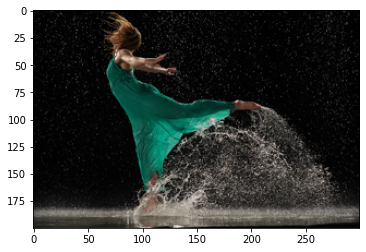

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_corr = Dancing.resize((300,200))
plt.imshow(img_corr)

Executando método que aplica a correlação com o filtro da média 3x3, de acordo com os parâmetros contidos no arquivo ```.txt```.

mask width:  3
mask_height:  3
img_frame  [[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


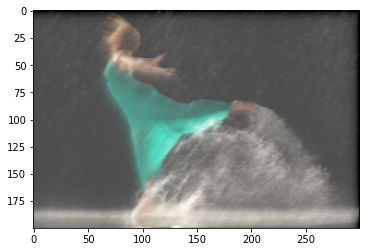

In [ ]:
# Altura e largura da imagem
width = img_corr.size[0]
height = img_corr.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_corr.load()

np_matrix_pixels = np.array(img_corr)

correlacao_MxN(width, height, matrix_pixels, np_matrix_pixels, "media_3x3_pivo_0x2_offset_25.txt")
img_corr.save("img_correlecao_media_3_3.jpg")
plt.imshow(img_corr)

Pode-se notar a aplicação de um _blur_, que deixa a imagem resultante borrada, de acordo com o tamanho do filtro. Também há uma variação de brilho, dada pelo _offset_.

Visualização da imagem original.

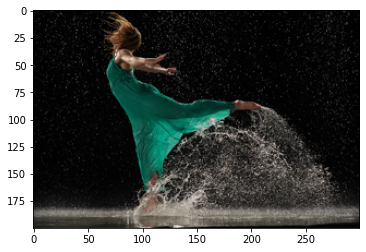

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_corr = Dancing.resize((300,200))
plt.imshow(img_corr)

Executando método que aplica a correlação com o filtro da média 7x7, de acordo com os parâmetros contidos no arquivo ```.txt```.

mask width:  7
mask_height:  7
img_frame  [[[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0]]]


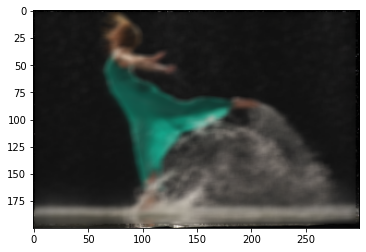

In [ ]:
# Altura e largura da imagem
width = img_corr.size[0]
height = img_corr.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_corr.load()

np_matrix_pixels = np.array(img_corr)

correlacao_MxN(width, height, matrix_pixels, np_matrix_pixels, "media_7x7_pivo_2x2_offset_10.txt")
img_corr.save("img_correlecao_media_7_7.jpg")
plt.imshow(img_corr)

Pode-se notar a aplicação de um _blur_, que deixa a imagem resultante borrada, de acordo com o tamanho do filtro; como o filtro é 7x7 o desfoque é maior que no caso anterior. Também há uma variação de brilho, dada pelo _offset_. Em comparação com o caso anterior, temos um _offset_ menor, o que resulta em uma alteração sutil no brilho.

Visualização da imagem original.

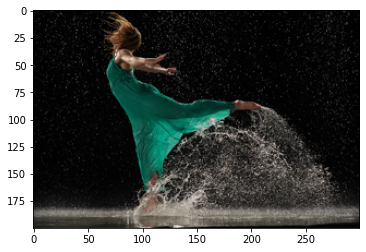

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_corr = Dancing.resize((300,200))
plt.imshow(img_corr)

Executando método que aplica a correlação com o filtro genérico 1x1, de acordo com os parâmetros contidos no arquivo ```.txt```.

mask width:  1
mask_height:  1
img_frame  [[[0]]

 [[0]]

 [[0]]]


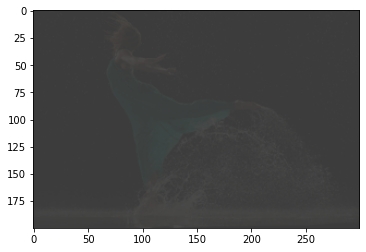

In [ ]:
# Altura e largura da imagem
width = img_corr.size[0]
height = img_corr.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_corr.load()

np_matrix_pixels = np.array(img_corr)

correlacao_MxN(width, height, matrix_pixels, np_matrix_pixels, "generico_1x1_pivo_0x0_offset_10.txt")
img_corr.save("img_correlecao_generica_1_1.jpg")
plt.imshow(img_corr)

Pode-se notar que a imagem permaneceu inalterada, visto que o filtro escolhido tem dimensão 1x1. Há uma grande variação no brilho, visto que o _offset_ foi consideravelmente alto.

Visualização da imagem original.

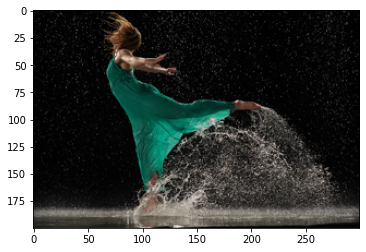

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_corr = Dancing.resize((300,200))
plt.imshow(img_corr)

Executando método que aplica a correlação com o filtro genérico 3x2, de acordo com os parâmetros contidos no arquivo ```.txt```.

mask width:  3
mask_height:  2
img_frame  [[[0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]]]


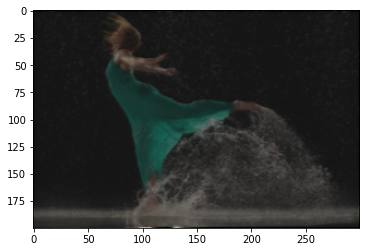

In [ ]:
# Altura e largura da imagem
width = img_corr.size[0]
height = img_corr.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_corr.load()

np_matrix_pixels = np.array(img_corr)

correlacao_MxN(width, height, matrix_pixels, np_matrix_pixels, "generico_3x2_pivo_0x2_offset_10.txt")
img_corr.save("img_correlecao_generica_3_2.jpg")
plt.imshow(img_corr)

Visualização da imagem original.

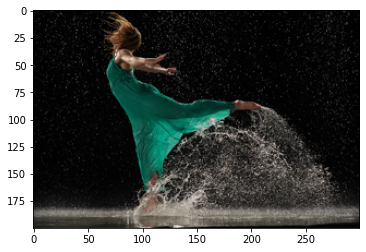

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_corr = Dancing.resize((300,200))
plt.imshow(img_corr)

Executando método que aplica a correlação com o filtro genérico 3x5, de acordo com os parâmetros contidos no arquivo ```.txt```.

mask width:  3
mask_height:  5
img_frame  [[[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]]


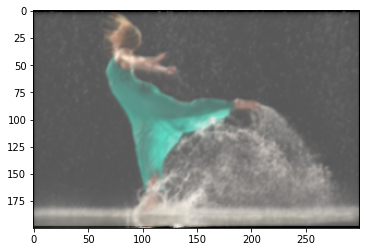

In [ ]:
# Altura e largura da imagem
width = img_corr.size[0]
height = img_corr.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_corr.load()

np_matrix_pixels = np.array(img_corr)

correlacao_MxN(width, height, matrix_pixels, np_matrix_pixels, "generico_3x5_pivo_1x2_offset_10.txt")
img_corr.save("img_correlecao_generica_3_5.jpg")
plt.imshow(img_corr)

Visualizando a imagem original.

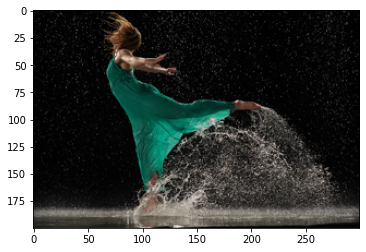

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_corr = Dancing.resize((300,200))
plt.imshow(img_corr)

Executando método que aplica o filtro Sobel horizontal 3x3, de acordo com os parâmetros contidos no arquivo ```.txt```.

mask width:  3
mask_height:  3


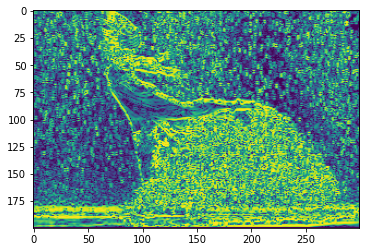

In [ ]:
# Altura e largura da imagem
width = img_corr.size[0]
height = img_corr.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_corr.load()

np_matrix_pixels = np.array(img_corr)

correlacao_MxN(width, height, matrix_pixels, np_matrix_pixels, "sobel_h_3x3_pivo_0x0_offset_50.txt")
img_corr.save("img_correlecao_sobel_h_3_3.jpg")

Visualização da imagem original.

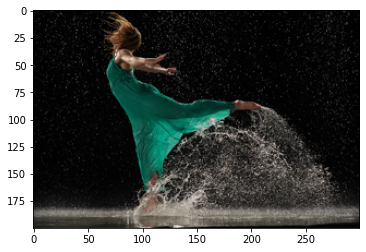

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_corr = Dancing.resize((300,200))
plt.imshow(img_corr)

Executando método que aplica o filtro Sobel vertical 3x3, de acordo com os parâmetros contidos no arquivo ```.txt```.

mask width:  3
mask_height:  3


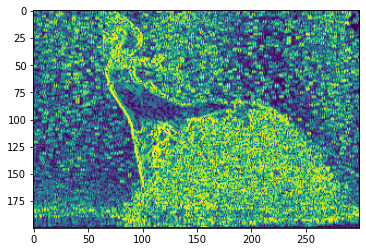

In [ ]:
# Altura e largura da imagem
width = img_corr.size[0]
height = img_corr.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_corr.load()

np_matrix_pixels = np.array(img_corr)

correlacao_MxN(width, height, matrix_pixels, np_matrix_pixels, "sobel_v_3x3_pivo_1x1_offset_50.txt")
img_corr.save("img_correlecao_sobel_v_3_3.jpg")

> ### **Quarto item**: Filtro mediana m x n, com m e n ímpares, sobre as bandas R, G e B

O filtro da mediana funciona da seguinte forma:

*  A cada iteração, os pixels são ordenados em ordem crescente;
*  Considera-se como resultado o termo central.

Desenvolvimento da função que aplica o filtro da mediana, com dimensões da matriz repassadas pelo usuário.


In [ ]:
def mediana(width, height, matrix_pixels, m, n):
  # Definindo os limites de altura e largura da mascara
  # Utilizar esses valores para limitar os laços que percorrem a imagem
  lim_mask_w = m//2 
  lim_mask_h = n//2

  # Copiando matriz de pixels para ser manipulada
  imagemFiltradaRGB = matrix_pixels.copy()

  # Máscaras do processamento UMA MATRIZ PARA CADA FAIXA DE LUZ R G B
  img_frame = np.zeros((3,m,n), dtype = int)

  # Inicializando inteiro que guarda o valor calculado pela mediana
  mediana = 0

  # Loop mais externo que percorre a imagem original
  # Percorrer altura do valor inicial que vai de [max_h] até valor final que é a [altura - max_h]
  for i in range(lim_mask_w, height - lim_mask_w): 
    # Percorrer largura do valor inicial que vai de [max_w] até valor final que é a [largura - max_w]
    for j in range(lim_mask_h, width - lim_mask_h):

      # Iteração que alterna entre os 3 canais R G B
      for indice_cor in range(3):
          mediana = 0
          count_mask_h = lim_mask_h
          count_mask_w = lim_mask_w

        # Atribuindo valores dos pixels da imagem original para o frame a ser calculado
          for k in range(m):
              for l in range(n):
                  img_frame[indice_cor][k][l] = matrix_pixels[i - count_mask_w, j - count_mask_h][indice_cor]
                  # Decrementar largura
                  count_mask_h -= 1 
              # Decrementar altura
              count_mask_w -= 1 
              # Reseta a largura para proximo laço (Caminhando da esquerda para direita de cima para baixo)
              count_mask_h = lim_mask_h

          # Calculando a mediana no frame
          mediana = np.median(img_frame[indice_cor,...])
          # Atribuindo para o pixel target
          matrix_pixels[i][j][indice_cor] = mediana

Visualização da imagem original.

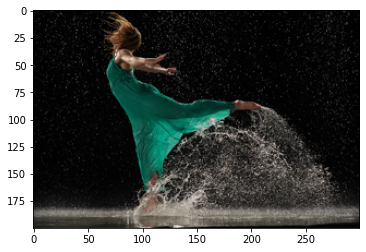

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_rgb_mediana = Dancing.resize((300, 200))
plt.imshow(img_rgb_mediana)

Executando o método de filtro da mediana na imagem em questão.

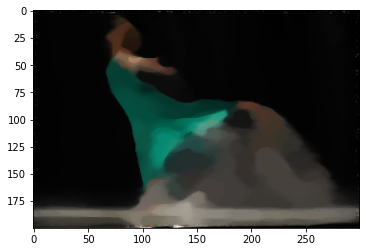

In [ ]:
# Altura e largura da imagem
width = img_rgb_mediana.size[0]
height = img_rgb_mediana.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = np.array(img_rgb_mediana)

# Definindo dimensões do filtro da mediana
m = 7
n = 9

# Passando os atributos para o método
mediana(width, height, matrix_pixels, m, n)
# Salvando a imagem com filtro da mediana mxn
img_mediana = Image.fromarray(matrix_pixels.astype('uint8'), 'RGB')
plt.imshow(img_mediana)
img_mediana.save(f"img_hsv_mediana_{m}_{n}.jpg")

A imagem resultante é muito próxima do esperado, visto que o efeito é de suavização. Como a dimensão escolhida foi 9x7, o efeito é significatimente observado.

Visualização da imagem original.

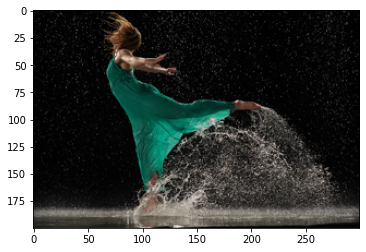

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_rgb_mediana = Dancing.resize((300, 200))
plt.imshow(img_rgb_mediana)

Executando o método de filtro da mediana na imagem em questão.

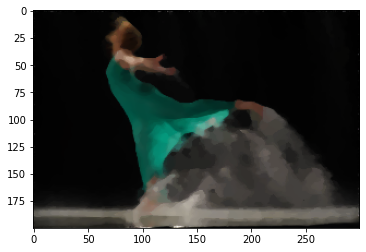

In [ ]:
# Altura e largura da imagem
width = img_rgb_mediana.size[0]
height = img_rgb_mediana.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = np.array(img_rgb_mediana)

# Definindo dimensões do filtro da mediana
m = 5
n = 5

# Passando os atributos para o método
mediana(width, height, matrix_pixels, m, n)
# Salvando a imagem com filtro da mediana mxn
img_mediana = Image.fromarray(matrix_pixels.astype('uint8'), 'RGB')
plt.imshow(img_mediana)
img_mediana.save(f"img_hsv_mediana_{m}_{n}.jpg")

A imagem resultante é muito próxima do esperado, visto que o efeito é de suavização. Ao contrário do exemplo anterior, a suavização foi mais branda, pois a dimensão escolhida foi 5x5.

> ### **Quinto item**: Controle de saturação no HSV, seguido de conversão para RGB


O sistema de cores HSV é formado pelas seguintes componentes: _Hue_ (matiz), _Saturation_ (saturação) e _Value_ (valor). Cada componente possui os seguintes aspectos:

* Matiz (tonalidade): Verifica o tipo de cor, abrangendo todas as cores do espectro, desde o vermelho até o violeta, mais o magenta. Atinge valores de 0 a 360$^{º}$.

* Saturação: Também chamado de "pureza". Quanto menor esse valor, mais com tom de cinza aparecerá a imagem. Quanto maior o valor, mais "pura" é a imagem. Atinge valores de 0 a 100%.

* Valor (brilho): Define o brilho da cor. Atinge valores de 0 a 100%.

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png" width="500"/>
</p>

Desenvolvimento da função que faz a conversão de RGB para HSV, realiza o ajuste de saturação (via parâmetro escolhido pelo usuário) e converte de HSV para RGB.

In [ ]:
def rgb_hsv(width, height, matrix_pixels, opcao):
  # Varrendo todas as colunas e linhas
  for i in range(width):
      for j in range(height):
          # Dado o pixel na posição [i,j]
          pixel = matrix_pixels[i,j]
          
          # Pixel separado nas três componentes
          R = pixel[0]
          G = pixel[1]
          B = pixel[2]

          # As três componentes são normalizadas - entre 0 e 1
          R, G, B = R / 255.0, G / 255.0, B / 255.0

          # São definidos a maior e a menor componente
          mx = max(R, G, B)
          mn = min(R, G, B)
          
          # Diferença entre a maior e a menor componente
          df = mx-mn

          # Se as três componentes são iguais, o ângulo é 0
          if R == G and G == B:
              H = 0
          
          # Se a maior componente for R, o pixel estará localizado entre 0 e 60
          elif mx == R:
              H = (60 * (G - B)) / df
          
          # Se a maior componente for G, o pixel estará localizado entre 120 e 180
          elif mx == G:
              H = 120 + ((60 * (B - R)) / df)
          
          # Se a maior componente for B, o pixel estará localizado entre 240 e 300
          elif mx == B:
              H = 240 + ((60 * (R - G)) / df)
          
          # Se o maior componente for 0, a saturação é zero
          if mx == 0:
              S = 0
          
          # Aqui entra o ajuste de saturação, conforme parâmetro do usuário
          elif opcao == 's+':
              '''
              Ajuste da saturação:
                * Multiplicar o resultado -> diminui a saturação
                * Dividir o resultado -> aumenta a saturação
              '''
              S = (df/mx) / 0.5
          
          elif opcao == 's-':
              S = (df/mx) * 0.5
          
          # O valor recebe a maior componente
          V = mx

          # Se o ângulo for negativo, o mesmo será localizado entre 0 e 360
          if H < 0:
              H = H + 360

          # Por termos uma imagem de 8 bits/pixel, precisamos ajustar os valores
          V = 255 * V
          S = 255 * S
          H = H / 2

          # Pixel resultante
          new_pixel = (round(H), round(S), round(V))

          # Inserção do novo pixel na matriz
          matrix_pixels[i,j] = new_pixel

Desenvolvimento da função que faz a conversão de HSV para RGB, resultando em uma nova imagem com aumento ou diminuição na intensidade das cores.

In [ ]:
def hsv_rgb(width, height, matrix_pixels):
  # Varrendo todas as colunas e linhas
  for i in range(width):
      for j in range(height):
          # Dado o pixel na posição [i,j]
          pixel = matrix_pixels[i,j]
          
          # Pixel separado nas três componentes
          H = pixel[0]
          S = pixel[1]
          V = pixel[2]
          
          # Retornando aos valores originais, adaptados por causa dos 8 bits/pixel
          H = H * 2
          V = V / 255
          S = S / 255

          # Criando constantes derivadas dos valores de S e V
          C = V * S
          X = C * (1 - abs(((H / 60) % 2) - 1))
          m = V - C

          # Se o pixel está localizado no 1º sextante
          if H >= 0 and H < 60:
              R, G, B = C, X, 0
          
          # Se o pixel está localizado no 2º sextante
          elif H >= 60 and H < 120:
              R, G, B = X, C, 0

          # Se o pixel está localizado no 3º sextante
          elif H >= 120 and H < 180:
              R, G, B = 0, C, X
          
          # Se o pixel está localizado no 4º sextante
          elif H >= 180 and H < 240:
              R, G, B = 0, X, C
          
          # Se o pixel está localizado no 5º sextante
          elif H >= 240 and H < 300:
              R, G, B = X, 0, C

          # Se o pixel está localizado no 6º sextante
          elif H >= 300 and H < 360:
              R, G, B = C, 0, X

          R, G, B = (R + m) * 255, (G + m) * 255, (B + m) * 255 

          # Conversão de volta para RGB, tornando o resultado um valor inteiro
          R = round(R)
          G = round(G)
          B = round(B)

          # Ajustando os limites para 0 e 255, a partir dos ternários
          R = 0 if R < 0 else R
          R = 255 if R > 255 else R
          G = 0 if G < 0 else G
          G = 255 if G > 255 else G
          B = 0 if B < 0 else B
          B = 255 if B > 255 else B

          # Pixel resultante
          new_pixel = (R, G, B)

          # Inserção do novo pixel na matriz
          matrix_pixels[i,j] = new_pixel

Visualização da imagem original.

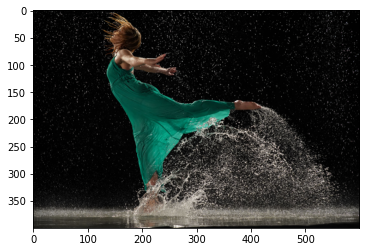

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_rgb_hsv = Dancing.resize((600, 400))
img_rgb_hsv.save("DancingResize.jpg")
plt.imshow(img_rgb_hsv)

Executando método que converte de RGB para HSV, diminuindo a saturação.

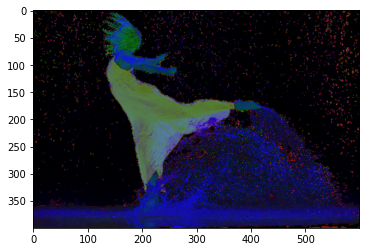

In [ ]:
# Altura e largura da imagem
width = img_rgb_hsv.size[0]
height = img_rgb_hsv.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_rgb_hsv.load()

# Diminuição da saturação
opcao = 's-'

# Passando os atributos para o método
rgb_hsv(width, height, matrix_pixels, opcao)
# Salvando a imagem convertida para HSV
img_rgb_hsv.save("img_rgb_hsv_" + opcao + ".jpg")
plt.imshow(img_rgb_hsv)

A imagem HSV gerada confere apenas uma informação a mais, não sendo necessária no processo de conversão.

Executando método que converte de HSV para RGB, demonstrando a diminuição na intensidade das cores.

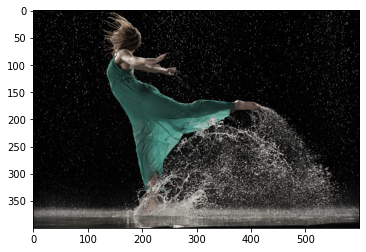

In [ ]:
# Altura e largura da imagem
width = img_rgb_hsv.size[0]
height = img_rgb_hsv.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_rgb_hsv.load()

# Passando os atributos para o método
hsv_rgb(width, height, matrix_pixels)
# Salvando a imagem convertida para RGB
img_rgb_hsv.save("img_hsv_rgb_" + opcao + ".jpg")
plt.imshow(img_rgb_hsv)

Nota-se, portanto, que a intesidade das cores, em comparação à imagem original, foi diminuída, demonstrando, assim, o resultado esperado.

Visualização da imagem original.

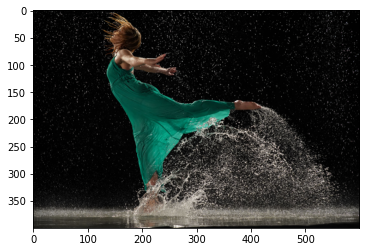

In [ ]:
Dancing = Image.open("DancingInWater.jpg")
img_rgb_hsv = Dancing.resize((600, 400))
plt.imshow(img_rgb_hsv)

Executando método que converte de RGB para HSV, aumentando a saturação.

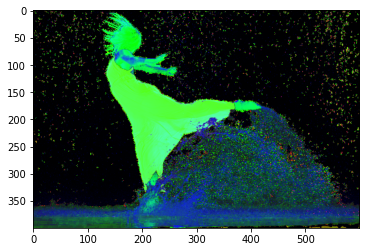

In [ ]:
# Altura e largura da imagem
width = img_rgb_hsv.size[0]
height = img_rgb_hsv.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_rgb_hsv.load()

# Aumento da saturação
opcao = 's+'

# Passando os atributos para o método
rgb_hsv(width, height, matrix_pixels, opcao)
# Salvando a imagem convertida para HSV
img_rgb_hsv.save("img_rgb_hsv_" + opcao + ".jpg")
plt.imshow(img_rgb_hsv)

A imagem HSV gerada confere apenas uma informação a mais, não sendo necessária no processo de conversão.

Executando método que converte de HSV para RGB, demonstrando o aumento na intensidade das cores.

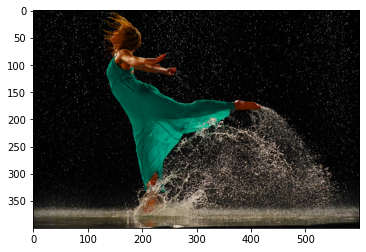

In [ ]:
# Altura e largura da imagem
width = img_rgb_hsv.size[0]
height = img_rgb_hsv.size[1]

# Obtendo a matriz de pixels da imagem
matrix_pixels = img_rgb_hsv.load()

# Passando os atributos para o método
hsv_rgb(width, height, matrix_pixels)
# Salvando a imagem convertida para RGB
img_rgb_hsv.save("img_hsv_rgb_" + opcao + ".jpg")
plt.imshow(img_rgb_hsv)

Nota-se, portanto, que a intesidade das cores, em comparação à imagem original, foi aumentada, demonstrando, assim, o resultado esperado.

> ## **Conclusões**

Portanto, conclui-se que os resultados gerados foram conforme o esperado, contribuindo para a revisão dos assuntos vistos em sala de aula e na aplicação prática destes, facilitando, assim, o processo de ensino e aprendizagem. 

Vale ressaltar que os algoritmos implementados não refletem o único caminho possível de desenvolvimento.